## Introduction

In this project, I analyze customer data to predict the Yearly Amount Spent using Linear Regression and compare it with regularized models like Ridge, Lasso, and Elastic Net.
I explore the data, check assumptions, evaluate residuals, and validate model performance using MAE, MSE, and RMSE.
The goal is to build a simple but reliable model that generalizes well to unseen data.

## Import Libraries and Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings('ignore')




/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers


In [2]:
print(os.listdir('/kaggle/input'))
print(os.listdir('/kaggle/input/focusing-on-mobile-app-or-website'))

['focusing-on-mobile-app-or-website']
['Ecommerce Customers']


In [3]:
df = pd.read_csv('/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


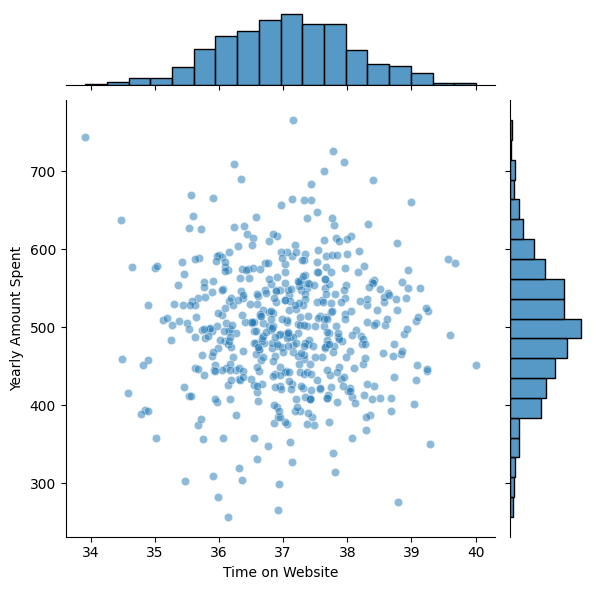

In [6]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, alpha=0.5)

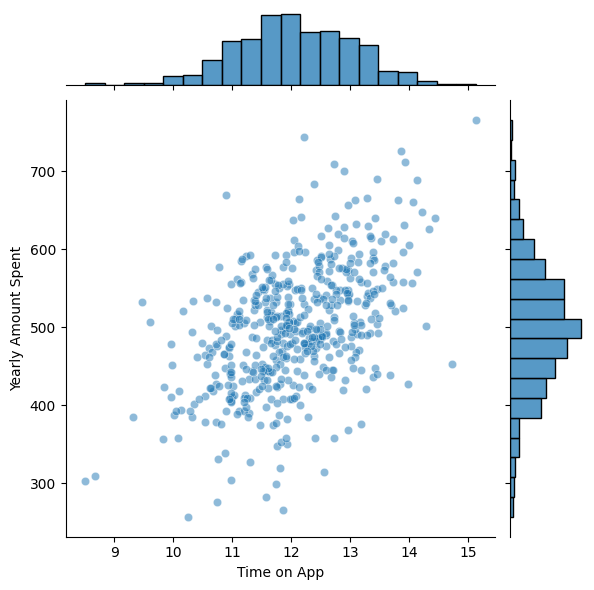

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, alpha=0.5)

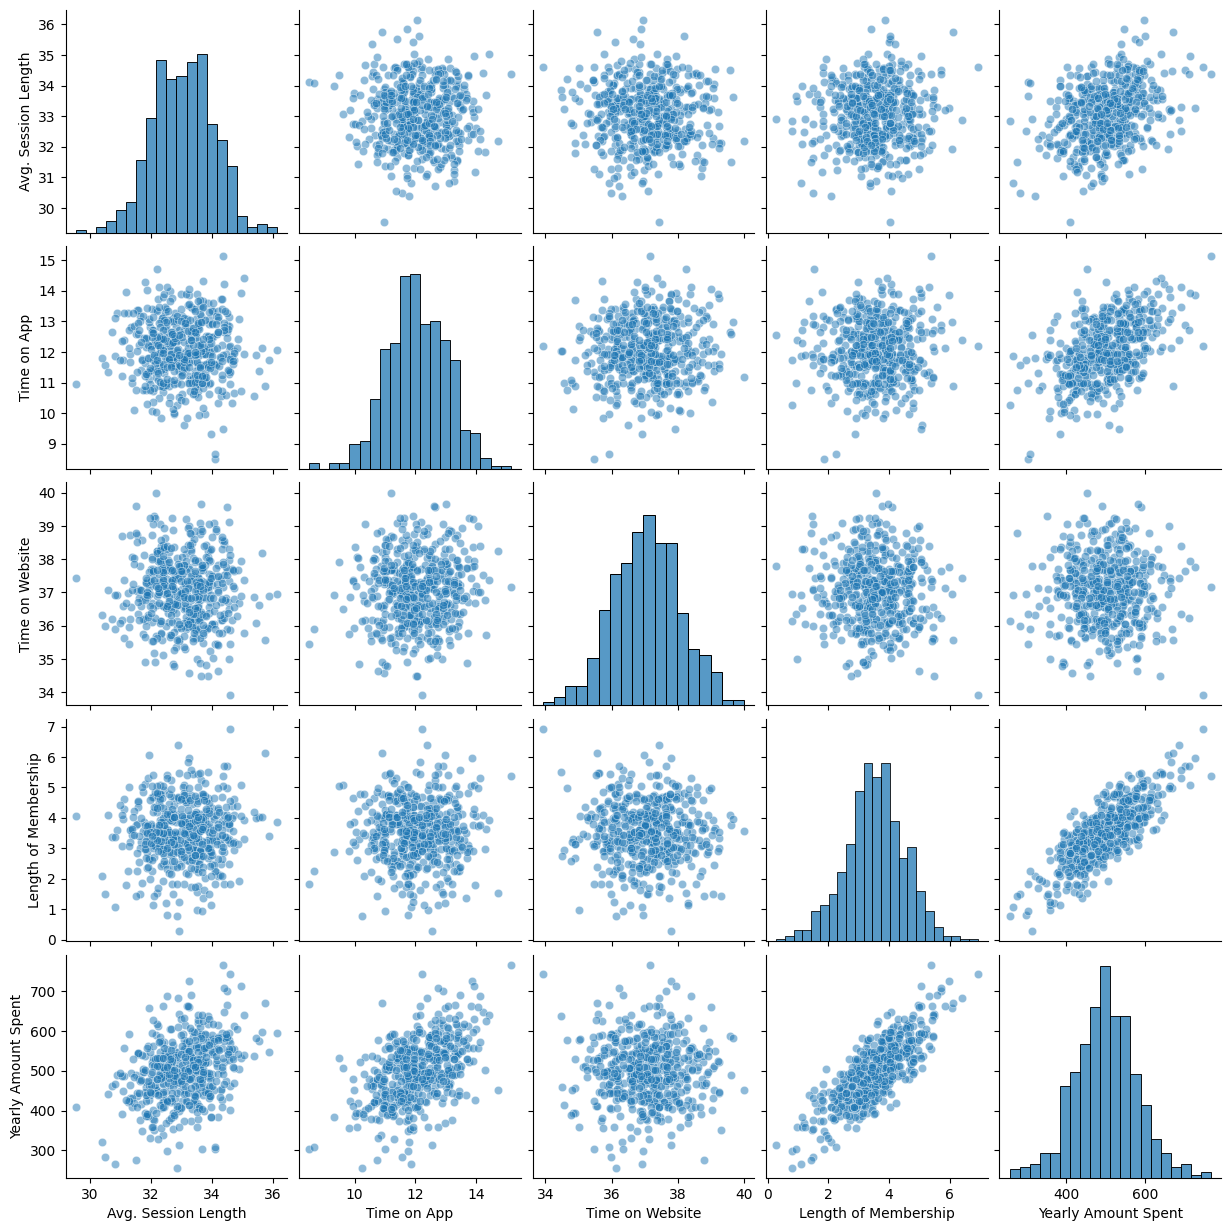

In [8]:
sns.pairplot(data=df, plot_kws={'alpha':0.5})

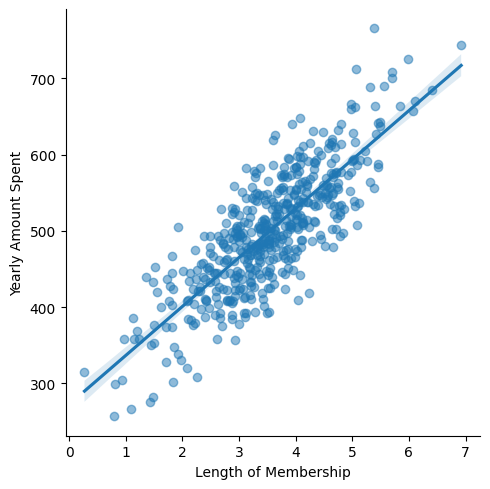

In [9]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df, scatter_kws={'alpha':0.5})

In [10]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Data Preprocessing

In [11]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Regression Model


In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
coeff = model.coef_
coeff

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [16]:
cdf = pd.DataFrame(model.coef_,X.columns,columns=['Coef'])
cdf

,Coef
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


We can see that Length of Membership will affect the customer spendings more and Time on Website will barely affect the spendings


In [17]:
predictions = model.predict(X_test)

In [18]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

In [19]:
mae

8.426091641432114

In [20]:
mse

103.91554136503323

In [21]:
rmse

10.19389726086315

In [22]:
final_model = LinearRegression()

In [23]:
final_model.fit(X,y)

LinearRegression()

In [24]:
final_predictions = final_model.predict(X)

In [25]:
residual = y - final_predictions

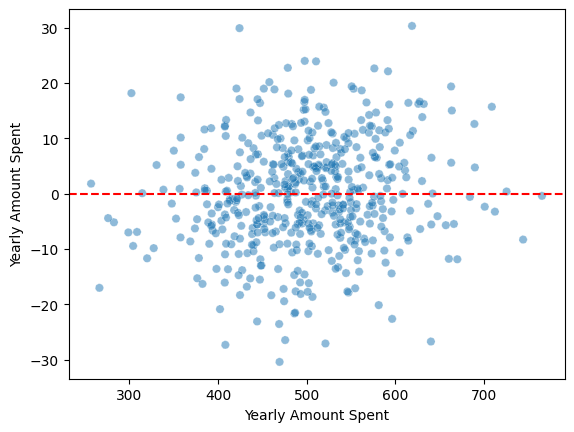

In [26]:
sns.scatterplot(x=y, y=residual, linestyle='--', alpha=0.5)
plt.axhline(y=0, color='red',linestyle='--')

The errors are random are not following a pattern so our model is good 

<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

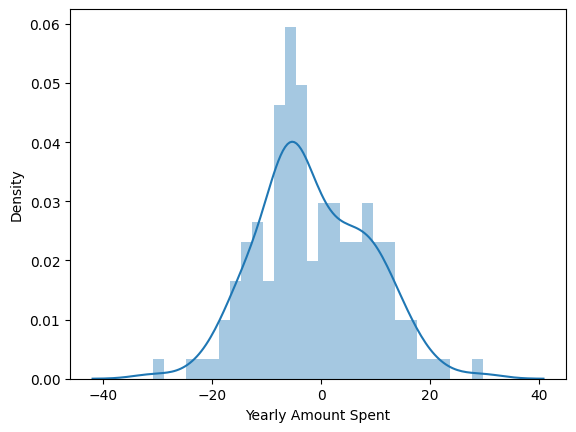

In [27]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

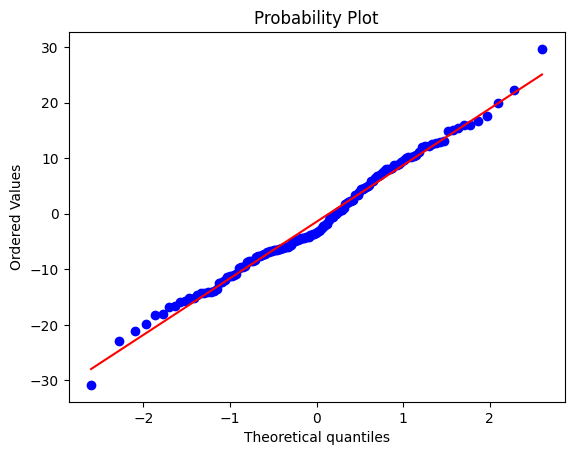

In [28]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

## Sample Customer Data Prediction

In [29]:
new_customer = [[34.2, 12.0, 37.8, 4.5]]

In [30]:
new_customer_prediction = final_model.predict(new_customer)

In [31]:
new_customer_prediction

array([586.63434641])

## Trying Regularization

### Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(X_train)

StandardScaler()

In [35]:
X_train = scaler.transform(X_train)

In [36]:
X_test = scaler.transform(X_test)

### RidgeCV

In [37]:
from sklearn.linear_model import RidgeCV

In [38]:
ridgecv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [39]:
ridgecv_model.fit(X_train, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [40]:
ridgecv_predictions = ridgecv_model.predict(X_test)

In [41]:
ridge_mae = mean_absolute_error(y_test, ridgecv_predictions)
ridge_mse = mean_squared_error(y_test, ridgecv_predictions)
ridge_rmse = np.sqrt(mse)

In [42]:
ridge_mae

8.425856209760308

In [43]:
ridge_mse

103.91489635572711

In [44]:
ridge_rmse

10.19389726086315

### LassoCV

In [45]:
from sklearn.linear_model import LassoCV

In [46]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [47]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [48]:
lasso_cv_model.alpha_

6.604301740910223

In [49]:
lasso_predictions = lasso_cv_model.predict(X_test)

In [50]:
lasso_MAE = mean_absolute_error(y_test,lasso_predictions)
lasso_MSE = mean_squared_error(y_test,lasso_predictions)
lasso_RMSE = np.sqrt(lasso_MSE)

In [51]:
lasso_MAE

12.034853732796652

In [52]:
lasso_MSE

212.8381016787799

In [53]:
lasso_RMSE

14.588971919870842

In [54]:
lasso_cv_model.coef_

array([19.10302793, 32.47212252,  0.        , 57.25032106])

### ElasticNet

In [55]:
from sklearn.linear_model import ElasticNetCV

In [56]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [57]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [58]:
elastic_model.l1_ratio_

1.0

In [59]:
elastic_predictions = elastic_model.predict(X_test)

In [60]:
elastic_MAE = mean_absolute_error(y_test,elastic_predictions)
elastic_MSE = mean_squared_error(y_test,elastic_predictions)
elastic_RMSE = np.sqrt(elastic_MSE)

In [61]:
elastic_MAE

8.42368192156644

In [62]:
elastic_MSE

103.92426681908096

In [63]:
elastic_RMSE

10.194325226275692

In [64]:
elastic_model.coef_

array([25.40533033, 38.68606801,  0.40444418, 63.29014434])

## Conclusion

In this project, I built a predictive model to estimate Yearly Amount Spent by customers based on their features. I started with Exploratory Data Analysis (EDA) to understand the data, check assumptions, and visualize relationships.

I implemented a Simple Linear Regression (OLS) model, which performed well — residual plots showed no strong patterns, indicating the assumptions of linearity and homoscedasticity were met. The residuals were approximately normally distributed, further supporting model adequacy.

To test whether regularization could improve performance, I applied RidgeCV, LassoCV, and ElasticNetCV:

- Ridge Regression gave nearly identical results to OLS, confirming that multicollinearity was not a major issue.

- Elastic Net also performed similarly, balancing L1 and L2 penalties.

- Lasso Regression, however, produced higher prediction errors because its L1 penalty shrank some coefficients to zero. This suggests that all features were relevant, and dropping any of them led to underfitting.

Overall, the Simple Linear Regression remains the best choice for this problem, providing a good fit without unnecessary complexity.
Regularization did not improve model performance, which demonstrates that the data is already well-suited for a basic linear approach.